In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

In [4]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


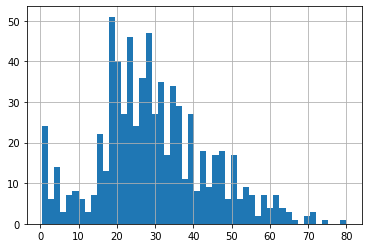

In [6]:
df['age'].hist(bins=50)

In [7]:
#take the end of the distribution and replace it
df['age'].mean() #gives the center

29.69911764705882

In [11]:
#from empirical rule after 3rd std we can get the end of the distribution
extreme = df['age'].mean()+3*df['age'].std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


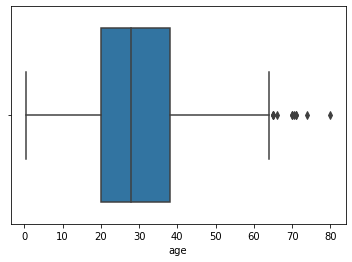

In [12]:
import seaborn as sns
sns.boxplot('age',data=df)

In [13]:
def impute_nan(df,variable,median,extreme):
  df[variable+'_end_distribution'] = df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [15]:
impute_nan(df,'age',df['age'].median,extreme)

In [16]:
df.head()

,survived,age,fare,age_end_distribution
0,0,22,7.2500,22.0
1,1,38,71.2833,38.0
2,1,26,7.9250,26.0
3,1,35,53.1000,35.0
4,0,35,8.0500,35.0


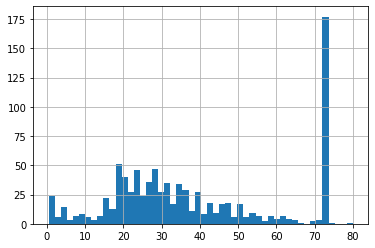

In [20]:
df['age_end_distribution'].hist(bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


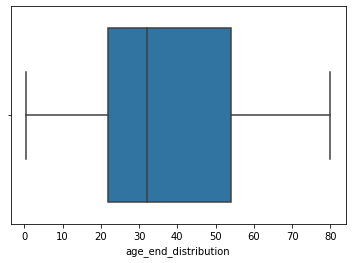

In [21]:
sns.boxplot('age_end_distribution',data=df)

### Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

###Disadvantages
1. Distorts the original distribution of the variable.
2. If missinges is not important, it may mask the predictive power of the original variable by distorting its distribution.
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered as an  outlier and preprocessed in a subsequent feature engineering.

### Arbitrary Value Imputation

It consists of replacing the NaN by an arbitrary value

This technique was derived from kaggle competition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

In [ ]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
#take least or most outlier value
def impute_nan(df,variable):
  df[variable+'_hundred']=df[variable].fillna(100)
  df[variable+'_zero']=df[variable].fillna(0)


1. Hard to decide which value to choose
2. Distorts the original distribution of the variable